In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
test = pd.read_csv('test_table.csv')

In [3]:
user = pd.read_csv('user_table.csv')

In [4]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [5]:
test.shape

(453321, 9)

In [6]:
user.shape

(452867, 4)

In [7]:
#joined table should be (453321, 12)
joined = pd.merge(test, user, how='left', on=['user_id'])

In [8]:
joined.shape

(453321, 12)

In [9]:
joined.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [10]:
joined = pd.merge(test, user, how='outer', on=['user_id'])

In [11]:
joined.shape

(453321, 12)

In [12]:
joined.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [13]:
joined.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [14]:
country_comparison = joined.groupby('country').mean()['conversion']

In [15]:
np.argmax(country_comparison, axis=0)

'Spain'

In [16]:
country_comparison['Spain']

0.079718821212004173

In [17]:
from scipy import stats

In [18]:
spain_z_score = (country_comparison['Spain']-.049579)/(0.217073)

In [19]:
print spain_z_score

0.138846476586


In [20]:
p_value = stats.norm.sf(spain_z_score)

In [21]:
p_value

0.44478573332406129

In [22]:
joined.groupby('test').mean()['conversion']

test
0    0.055179
1    0.043425
Name: conversion, dtype: float64

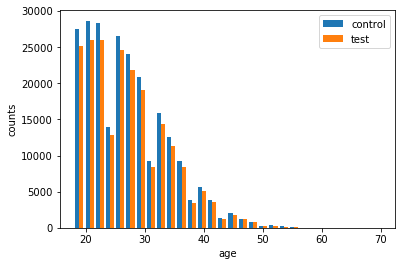

In [23]:
sample_0 = joined[joined['test']==0]
sample_1 = joined[joined['test']==1]

#distribution of age

plt.hist([sample_0['age'].dropna(), sample_1['age'].dropna()], bins=30,normed=False, label=['control', 'test'])
plt.xlabel('age')
plt.ylabel('counts')
plt.legend(loc='upper right')
plt.show()

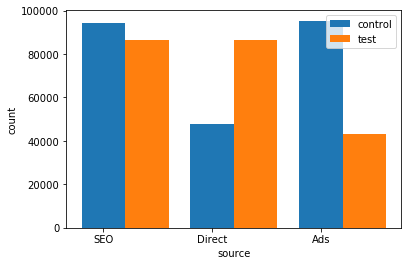

In [24]:
#distribution of ads_channel
def bar(feature):
    width = 0.4
    temp_control = Counter(sample_0[feature].dropna())
    temp_test = Counter(sample_1[feature].dropna())
    x = np.arange(len(temp_control.values()))
    x1 = np.arange(len(temp_test.values()))
    plt.bar(x, temp_control.values(), width, label='control')
    plt.bar(x+width, temp_test.values(), width, label='test')
    plt.xticks(x, temp_control.keys())
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.legend(loc='upper right')
    plt.show()
    
bar('source')

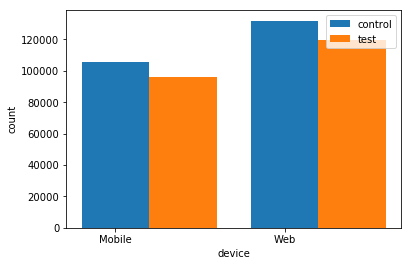

In [25]:
#distribution of device
bar('device')

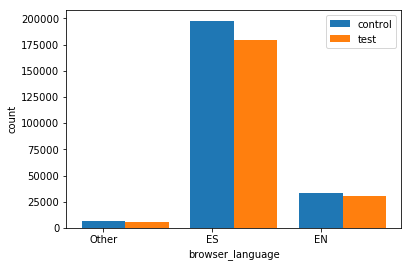

In [26]:
#distribution of browser lang
bar('browser_language')

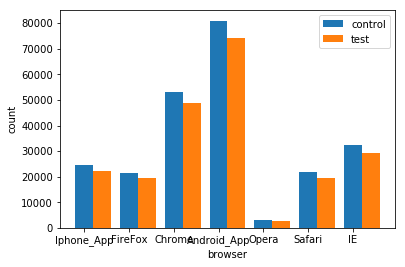

In [27]:
#distribution of browser
bar('browser')

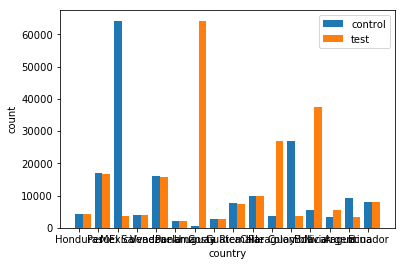

In [28]:
#distribution of country
sample_0 = sample_0[sample_0['country']!='Spain']
bar('country')

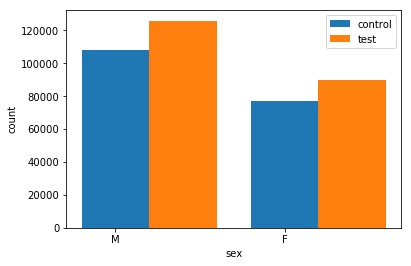

In [29]:
# distribution of sex
bar('sex')

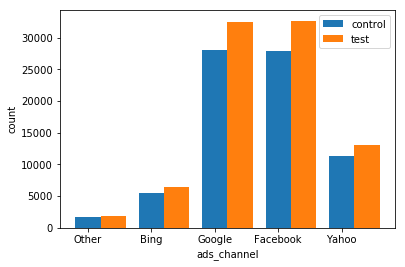

In [30]:
# distribution of ads channel
bar('ads_channel')

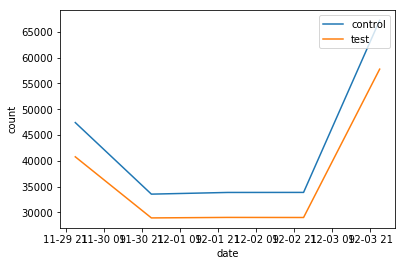

In [31]:
#date- time series comparison
from datetime import datetime
time_series_0 = Counter(sample_0['date'])
time_series_1 = Counter(sample_1['date'])
# couldn't solve the following error for this:
# strptime() argument 1 must be string, not numpy.ndarray
#temp1=np.apply_along_axis(lambda i: datetime.strptime(i, '%Y-%m-%d'), 0, time_series_0.keys())
#temp2=np.apply_along_axis(lambda i: datetime.strptime(i, '%Y-%m-%d'), 0, time_series_1.keys())
temp1 = []
temp2=[]
for value in time_series_0.keys():
    temp1.append(datetime.strptime(value, '%Y-%m-%d'))
for value in time_series_1.keys():
    temp2.append(datetime.strptime(value, '%Y-%m-%d'))

temp1.sort()
temp2.sort()
plt.plot(temp2, time_series_1.values(), label='control')
plt.plot(temp1, time_series_0.values(), label='test')
plt.xlabel('date')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.show()


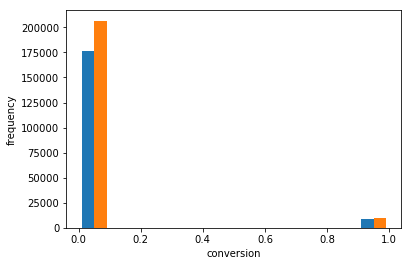

In [32]:
# the distributions of the variables for the test and control groups are similar except for
# the distribution of countries. As shown in the graph, even with spain removed as an outlier (see below), the
# distribution of countries is not similar across the control and test groups. Thus, "country" could be
# a potential bias that warrants further exploration; however, for now the assignment asks us to "confirm"
# their conclusion. 

#first, we should check the distribution of the two samples based on conversion
plt.hist([sample_0['conversion'].dropna(), sample_1['conversion'].dropna()], normed=False)
plt.xlabel('conversion')
plt.ylabel('frequency')
plt.show()

In [33]:
t_stat, p_value = stats.ttest_ind(sample_0['conversion'], sample_1['conversion'], equal_var=False, axis=0)
t_stat


7.3939374121344805

In [34]:
p_value

1.4282994754055316e-13

In [35]:
#p_value < alpha => reject null hypothesis that means of two samples
# are not different => statistically significant difference between control and test group
# the spanish verison works BETTER than localized-translations
len(sample_0['conversion'])

185556

In [36]:
len(sample_1['conversion'])

215983

In [37]:
#size of sample is not leading to high t-statistic bc they are essentially populations
#possible explanations = 
#-->test and control groups are not chosen randomly/independently
#    (and thus fails to pass the random/independence prereq for 2sam test)

In [38]:
#testing if groups were chosen randomly/independently
#first obvious feature to test, is country (as Spain showed significant)
#difference in conversion rates, compared to other countries
mean_by_country = joined.groupby(['country', 'test']).mean()['conversion']
total_test_0, total_test_1 = joined.groupby('test').size()
mean_by_country

#spain is obviously skewing the data which is why we removed it in the beginning
# --> already evidence for country bias skewing results


country      test
Argentina    0       0.015071
             1       0.013725
Bolivia      0       0.049369
             1       0.047901
Chile        0       0.048107
             1       0.051295
Colombia     0       0.052089
             1       0.050571
Costa Rica   0       0.052256
             1       0.054738
Ecuador      0       0.049154
             1       0.048988
El Salvador  0       0.053554
             1       0.047947
Guatemala    0       0.050643
             1       0.048647
Honduras     0       0.050906
             1       0.047540
Mexico       0       0.049495
             1       0.051186
Nicaragua    0       0.052647
             1       0.054177
Panama       0       0.046796
             1       0.049370
Paraguay     0       0.048493
             1       0.049229
Peru         0       0.049914
             1       0.050604
Spain        0       0.079719
Uruguay      0       0.012048
             1       0.012907
Venezuela    0       0.050344
             1       0

In [39]:
#calculate mean conversion rate, and proportion in sample based on country, divided into test and control groups
# 0 = control group; 1 = test_group
from __future__ import division
def find_p_value(country):
    if type(country) is str:
        t_stat, p_value = stats.ttest_ind(sample_0[sample_0['country']==country]['conversion'], sample_1[sample_1['country']==country]['conversion'], equal_var=False, axis=0)
        return p_value

sample_1 = sample_1[sample_1['country']!='Spain']
sample_0 = sample_0[sample_0['country']!='Spain']
country_by_0_mean = sample_0.groupby(['country']).mean()['conversion']
country_by_1_mean = sample_1.groupby(['country']).mean()['conversion']
country_by_0_prop = np.apply_along_axis(lambda i: i/total_test_0, 0, sample_0.groupby(['country']).size())
country_by_1_prop = np.apply_along_axis(lambda i: i/total_test_1, 0, sample_1.groupby(['country']).size())
#also could not figure out why the below doesn't work and the for loop does


df = pd.DataFrame({"mean in control": country_by_0_mean,
                    "mean in test" : country_by_1_mean,
                    "prop in control": country_by_0_prop,
                    "prop in test": country_by_1_prop                    
                  })

# couldn't figure out why the following returns an array(None, dtype=object)
#p_values = np.apply_along_axis(find_p_value, 0, df.index.values)
p_values=[]
for val in df.index.values:
    p_values.append(find_p_value(val))

df['p_values'] = p_values
df


,mean in control,mean in test,prop in control,prop in test,p_values
country,,,,,
Argentina,0.015071,0.013725,0.039421,0.173055,0.335147
Bolivia,0.049369,0.047901,0.023384,0.025808,0.718885
Chile,0.048107,0.051295,0.041515,0.045763,0.302848
Colombia,0.052089,0.050571,0.114133,0.124880,0.423719
Costa Rica,0.052256,0.054738,0.011208,0.012265,0.687876
Ecuador,0.049154,0.048988,0.033859,0.036387,0.961512
El Salvador,0.053554,0.047947,0.017309,0.018830,0.248127
Guatemala,0.050643,0.048647,0.032115,0.034739,0.572107
Honduras,0.050906,0.047540,0.018375,0.019478,0.471463


In [40]:
#p-values for ttest too high for all countries to be significant in the difference of mean conversion rate

# however, it's apparent that the representations of populations is not equal in the
# control and test groups; --> COUNTRIES clearly affected the
# choosing of the "random" partition into control aand test groups
# we can run a chisquare test for homogenity

def error_with_data(sample_0, sample_1):
    freq_0 = sample_0.groupby('country').size()
    freq_1 = sample_1.groupby('country').size()
    stat, p_value = stats.chisquare(freq_0.values, freq_1.values)
    return p_value<0.05

error_with_data(sample_0, sample_1)

    

True

In [41]:
#p-value<alpha level, so we reject null hypothesis and with high confidence
#say that the proportion of countries represented in the test group
#is NOT homogenous --> it was not random selection when dividing into
#test and control groups --> explains why the a/b test gave the suprising
#results that localized translation was not preferred 

#conclusion: the a/b test is ultimately inconclusive, as there was not
#random selection between the test and control groups. As such, no 
#statistically-backed inferences can be made on the preferences of
#spanish translation across various countries

#note: two sample t tests to compare mean of a country (for both control)
#and test to the overall mean are too close to produce low p values, 
#implying that the means of conversion rates are not significantly different
#however, #notice uruguay's statistics: the mean conversion rate in control 
#and test groups were about 1.2%, much lower than the mean conversion 
# rates of 5.5 % and 4.3 % respectively. 
#While this doesn't speak to the randomness of test/control selection, 
# it does highlight a difference between thewebsite's performance in 
#Uruguay, and other Spanish-speaking countries (namely that Urguay could be
# a potential outlier in any further, accurate data)